# Intégration

## Intégrale comme limite d'une somme

La manière la plus naturelle de comprendre les intégrales est en la définissant comme l'aire sous une fonction, que l'on peut calculer en faisant la somme de rectangles et en en calculant la limite.

Soit $f$ une fonction réelle continue, ainsi:
$$\int_a^b f(x) dx = \lim_{n \to +\infty} \sum_{i=0}^{n-1} \frac{b-a}{n} \times f(a+i \frac{b-a}{n})$$
où $\frac{b-a}{n}$ représente intuitivement la largeur de chaque rectangle. Ainsi, plus les largeurs diminueront, plus l'écart entre cette somme et l'aire sera négligeable, et tendront à être égales.

On pourrait alors visualiser cela, en calculant les approximations successives avec Python et voyant qu'elles convergent.

Le programme ci-dessous calcule la somme données ci-dessous, mais en calcule aussi une seconde, lègerement différente:
$$\int_a^b f(x) dx = \lim_{n \to +\infty} \sum_{i=0}^{n-1} \frac{b-a}{n} \times f(a+(i+1) \frac{b-a}{n})$$
Ici, au lieu de donner la hauteur de chaque rectangle "par la gauche" de celui-ci, on l'a "par la droite". Cela donne deux sommes, qui convergeront vers une même limite, et encadrent l'aire de la courbe. 

In [3]:
def int_rectangle(f, a, b, nb_rect=100):
    somme_sup, somme_inf = 0,0
    largeur_rect = (b-a)/nb_rect
    for i in range(nb_rect):
        somme_inf += f(a + i*largeur_rect) * largeur_rect
        somme_sup += f(a + (i+1)*largeur_rect) * largeur_rect
    return (somme_inf, somme_sup)
    

Remarquons aussi qu'une autre méthode existe, celle "des milieux", prenant comme hauteur le milieu du rectangle.

In [4]:
def int_milieux(f, a, b, nb_rect=100):
    somme = 0
    largeur = (b-a)/nb_rect
    for i in range(nb_rect):
        somme += f(a + (i+1/2) * largeur) * largeur
    return somme

Une autre n'utilise non pas la formule du rectangle, mais la formule du trapèze, et calcule la somme de trapèzes suivant la courbe.
$$\int_a^b f(x) dx = \lim_{n \to +\infty} \sum_{i=0}^{n-1} \frac{b-a}{n} \times \frac{f(a+(i+1) \frac{b-a}{n}) + f(a+i \frac{b-a}{n})}{2}$$

Cette dernière permet d'obtenir en générale des approximations très légèrement plus précises pour un même $n$ donné.

In [5]:
def int_trapeze(f, a, b, nb_rect=100):
    somme = 0
    largeur = (b-a)/nb_rect
    for i in range(nb_rect):
        somme += (f(a + i*largeur) + f(a + (i+1)*largeur))/2 * largeur
    return somme

## Calculer... en tirant des fléchettes

Maintenant que nous avons vu les manières rigoureuses de calculer des intégrales, voyons une approche plus originale: [la méthode de Monte-Carlo](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Monte-Carlo).

Cette méthode, tirant son nom du [Casino de Monte-Carlo](https://fr.wikipedia.org/wiki/Casino_de_Monte-Carlo), désigne plusieurs algorithmes faisant des calculs à partir du hasard.

Imaginons que nous voulons calculer l'aire sous une courbe dans un cadre précis (entre $x_0$ et $x_1$ en abscisse et $y_0$ et $y_1$ en ordonnée). Nous allons alors tirer de manière homogène des "fléchettes", avec des coordonnées $(x,y)$, et regarder quelle proportion est parvenue dans l'aire que l'on cherche. En tirant suffisamment de fléchettes, il suffira de calculer $p \times A$, avec $p$ la proportion de touchés et $A$ l'aire du cadre, pour estimer l'aire sous la courbe.

Par exemple, si le cadre a une aire de $4$, et que la proportion de touchés est $p=0.5$, alors l'aire sous la courbe est de $0.5 \times 4 = 2$.

In [6]:
from math import sqrt
import random

def monte_carlo(f, borne_abs, borne_ord, tirs=1000):
    touches = 0
    x0, x1 = borne_abs
    y0, y1 = borne_ord
    for _ in range(tirs):
        x = random.uniform(x0, x1)
        y = random.uniform(y0, y1)
        if abs(y - f(x)) <= 0:
            touches += 1
    return (touches / tirs) * (x1 - x0) * (y1 - y0)

Cette méthode permet non seulement de calculer l'aire sous une courbe de la forme $y=f(x)$, mais d'aires en général.

Par exemple, l'algorithme ci-dessous tirent des fléchettes dans un carré de 2x2, et calcule la proportion entrant dans un cercle de rayon 1. L'aire du cercle est normalement de $\pi \times 1^2 = \pi$, donc cet algorithme permet d'estimer le nombre $\pi$ !

In [7]:
def approx_pi(tirs=1000):
    touches = 0
    for _ in range(tirs):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if sqrt(x**2+y**2) <= 1:
            touches += 1
    return touches / tirs * 4

In [9]:
approx_pi(10000)

3.1324

Voici un graphique donnant des approximations de $\pi$ par cette technique en fonction du nombre de tirs:

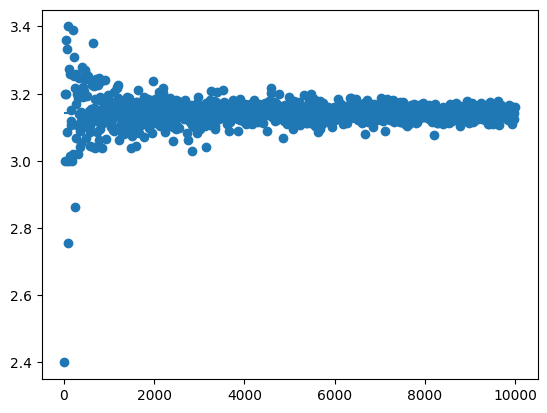

In [13]:
import matplotlib.pyplot as plt

x = list(range(10, 10000, 10))
y = [approx_pi(n) for n in x]
plt.scatter(x, y)

Ces approximations ne sont pas phénoménales, mais la méthode mérite d'être mentionnée !